<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Twitter_movie_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Twitter Movie Ratings

In [1]:
import pandas as pd

ratings_dat=pd.read_csv('https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat',
                        sep='::',names= ['user_id','movie_id','rating','rating_timestamp'])
ratings_dat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,1381006850
1,2,208092,5,1586466072
2,2,358273,9,1579057827
3,2,10039344,5,1578603053
4,2,6751668,9,1578955697
...,...,...,...,...
861316,67132,1843866,10,1396584788
861317,67132,1951264,10,1385101263
861318,67132,2267998,8,1415578263
861319,67132,2582846,10,1402022562


In [2]:
movies_dat=pd.read_csv('https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat',
                       sep='::',names=['movie_id','movie_title','genre'],index_col=0)
movies_dat = movies_dat.drop_duplicates()
movies_dat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_title,genre
movie_id,,
8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
10,La sortie des usines Lumière (1895),Documentary|Short
12,The Arrival of a Train (1896),Documentary|Short
25,The Oxford and Cambridge University Boat Race ...,NaN
91,Le manoir du diable (1896),Short|Horror
...,...,...
11987296,Chris D'Elia: No Pain (2020),Comedy
12027020,LA Originals (2020),Documentary
12036052,Elephant (2020),Documentary|Adventure|Biography|Family


In [3]:
num_ratings = ratings_dat.groupby('movie_id')['rating'].count()
num_ratings.name = 'num_ratings'
movies_dat = movies_dat.join(num_ratings).sort_values(by='num_ratings',
                                                       ascending=False)
movies_dat

,movie_title,genre,num_ratings
movie_id,,,
1454468,Gravity (2013),Drama|Sci-Fi|Thriller,3086
816692,Interstellar (2014),Adventure|Drama|Sci-Fi,2868
993846,The Wolf of Wall Street (2013),Biography|Crime|Drama,2793
8579674,1917 (2019),Drama|War,2766
7286456,Joker (2019),Crime|Drama|Thriller,2679
...,...,...,...
924133,Doorman (2006),Short|Drama|Romance,1
923714,Haebaragi (2006),Action|Drama,1
923703,Geuhae yeoreum (2006),Drama|Romance,1


In [4]:
movies_dat = movies_dat[:100]
movies_dat

,movie_title,genre,num_ratings
movie_id,,,
1454468,Gravity (2013),Drama|Sci-Fi|Thriller,3086
816692,Interstellar (2014),Adventure|Drama|Sci-Fi,2868
993846,The Wolf of Wall Street (2013),Biography|Crime|Drama,2793
8579674,1917 (2019),Drama|War,2766
7286456,Joker (2019),Crime|Drama|Thriller,2679
...,...,...,...
2582846,The Fault in Our Stars (2014),Drama|Romance,1094
1690953,Despicable Me 2 (2013),Animation|Adventure|Comedy|Family|Fantasy|Sci-Fi,1091
1950186,Ford v Ferrari (2019),Action|Biography|Drama|Sport,1083


In [5]:
ratings_dat = ratings_dat.loc[[movie_id in movies_dat.index 
                               for movie_id in ratings_dat.movie_id]]
ratings_dat

,user_id,movie_id,rating,rating_timestamp
4,2,6751668,9,1578955697
5,2,7131622,8,1579559244
8,2,8367814,8,1586436354
9,2,8579674,10,1579261830
10,2,8946378,8,1584300027
...,...,...,...,...
861313,67131,8946378,7,1581119206
861316,67132,1843866,10,1396584788
861317,67132,1951264,10,1385101263
861318,67132,2267998,8,1415578263


In [6]:
user_list =set(ratings_dat.user_id)
len(user_list)

35398

In [7]:
df = ratings_dat.pivot(index='user_id', 
                         columns='movie_id', 
                         values='rating') 

df = df[movies_dat.index]
df.columns = [movies_dat.movie_title[movie_id] for movie_id in df.columns]

df

,Gravity (2013),Interstellar (2014),The Wolf of Wall Street (2013),1917 (2019),Joker (2019),Man of Steel (2013),World War Z (2013),Iron Man Three (2013),Now You See Me (2013),Gone Girl (2014),Captain Phillips (2013),Prisoners (2013),The Revenant (2015),The Imitation Game (2014),Mad Max: Fury Road (2015),The Great Gatsby (2013),Star Trek Into Darkness (2013),Deadpool (2016),12 Years a Slave (2013),American Hustle (2013),The Hunger Games: Catching Fire (2013),Her (2013),Oblivion (2013),Whiplash (2014),X-Men: Days of Future Past (2014),Dunkirk (2017),The Grand Budapest Hotel (2014),Rush (2013),Captain America: The Winter Soldier (2014),Gisaengchung (2019),Hacksaw Ridge (2016),The Hobbit: The Desolation of Smaug (2013),Dallas Buyers Club (2013),Arrival (2016),Batman v Superman: Dawn of Justice (2016),The Conjuring (2013),Pacific Rim (2013),Guardians of the Galaxy (2014),La La Land (2016),Django Unchained (2012),...,Doctor Strange (2016),Room (2015),Ant-Man (2015),American Sniper (2014),We're the Millers (2013),Olympus Has Fallen (2013),Jurassic World (2015),Dawn of the Planet of the Apes (2014),Avengers: Infinity War (2018),Fast & Furious 6 (2013),The Amazing Spider-Man 2 (2014),This Is the End (2013),The Theory of Everything (2014),Get Out (2017),Spotlight (2015),Frozen (2013),Wonder Woman (2017),Lucy (2014),The Secret Life of Walter Mitty (2013),Split (2016),It (2017),Argo (2012),John Wick (2014),"Three Billboards Outside Ebbing, Missouri (2017)",Spectre (2015),Manchester by the Sea (2016),Non-Stop (2014),Black Panther (2018),Spider-Man: Homecoming (2017),The Gentlemen (2019),Inside Out (2015),The Hangover Part III (2013),Knives Out (2019),Sully (2016),Boyhood (2014),The Fault in Our Stars (2014),Despicable Me 2 (2013),Ford v Ferrari (2019),Ex Machina (2014),The Equalizer (2014)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67123,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,N

In [8]:
user_list = df.notna().sum(axis=1).sort_values(ascending=False)[:5000].index
df = df.loc[user_list]
df

,Gravity (2013),Interstellar (2014),The Wolf of Wall Street (2013),1917 (2019),Joker (2019),Man of Steel (2013),World War Z (2013),Iron Man Three (2013),Now You See Me (2013),Gone Girl (2014),Captain Phillips (2013),Prisoners (2013),The Revenant (2015),The Imitation Game (2014),Mad Max: Fury Road (2015),The Great Gatsby (2013),Star Trek Into Darkness (2013),Deadpool (2016),12 Years a Slave (2013),American Hustle (2013),The Hunger Games: Catching Fire (2013),Her (2013),Oblivion (2013),Whiplash (2014),X-Men: Days of Future Past (2014),Dunkirk (2017),The Grand Budapest Hotel (2014),Rush (2013),Captain America: The Winter Soldier (2014),Gisaengchung (2019),Hacksaw Ridge (2016),The Hobbit: The Desolation of Smaug (2013),Dallas Buyers Club (2013),Arrival (2016),Batman v Superman: Dawn of Justice (2016),The Conjuring (2013),Pacific Rim (2013),Guardians of the Galaxy (2014),La La Land (2016),Django Unchained (2012),...,Doctor Strange (2016),Room (2015),Ant-Man (2015),American Sniper (2014),We're the Millers (2013),Olympus Has Fallen (2013),Jurassic World (2015),Dawn of the Planet of the Apes (2014),Avengers: Infinity War (2018),Fast & Furious 6 (2013),The Amazing Spider-Man 2 (2014),This Is the End (2013),The Theory of Everything (2014),Get Out (2017),Spotlight (2015),Frozen (2013),Wonder Woman (2017),Lucy (2014),The Secret Life of Walter Mitty (2013),Split (2016),It (2017),Argo (2012),John Wick (2014),"Three Billboards Outside Ebbing, Missouri (2017)",Spectre (2015),Manchester by the Sea (2016),Non-Stop (2014),Black Panther (2018),Spider-Man: Homecoming (2017),The Gentlemen (2019),Inside Out (2015),The Hangover Part III (2013),Knives Out (2019),Sully (2016),Boyhood (2014),The Fault in Our Stars (2014),Despicable Me 2 (2013),Ford v Ferrari (2019),Ex Machina (2014),The Equalizer (2014)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65096,8.0,9.0,9.0,10.0,9.0,7.0,5.0,5.0,5.0,9.0,8.0,9.0,9.0,NaN,9.0,6.0,8.0,7.0,9.0,6.0,6.0,9.0,9.0,9.0,7.0,10.0,8.0,8.0,7.0,NaN,8.0,6.0,8.0,8.0,5.0,NaN,8.0,7.0,7.0,NaN,...,7.0,7.0,8.0,7.0,5.0,6.0,7.0,9.0,8.0,7.0,7.0,7.0,6.0,8.0,8.0,5.0,6.0,6.0,7.0,7.0,7.0,NaN,6.0,8.0,6.0,7.0,NaN,8.0,8.0,NaN,9.0,5.0,9.0,8.0,7.0,6.0,5.0,NaN,8.0,7.0
25177,8.0,9.0,8.0,NaN,6.0,8.0,8.0,7.0,6.0,7.0,6.0,8.0,9.0,8.0,9.0,7.0,8.0,9.0,7.0,8.0,7.0,10.0,7.0,7.0,9.0,8.0,9.0,10.0,NaN,9.0,8.0,7.0,9.0,9.0,5.0,8.0,7.0,NaN,NaN,9.0,...,7.0,8.0,8.0,7.0,6.0,4.0,7.0,9.0,8.0,6.0,7.0,6.0,8.0,8.0,8.0,8.0,7.0,6.0,7.0,8.0,9.0,NaN,9.0,4.0,6.0,8.0,6.0,5.0,7.0,NaN,NaN,5.0,NaN,NaN,9.0,7.0,8.0,NaN,9.0,5.0
3428,9.0,9.0,9.0,9.0,9.0,7.0,8.0,NaN,8.0,8.0,10.0,8.0,10.0,8.0,10.0,8.0,NaN,8.0,8.0,8.0,8.0,9.0,8.0,NaN,8.0,9.0,8.0,8.0,7.0,9.0,8.0,9.0,9.0,9.0,8.0,8.0,NaN,8.0,8.0,NaN,...,7.0,9.0,9.0,8.0,8.0,8.0,9.0,8.0,NaN,9.0,7.0,8.0,8.0,8.0,8.0,9.0,NaN,7.0,8.0,7.0,6.0,9.0,9.0,10.0,7.0,9.0,7.0,NaN,8.0,NaN,10.0,8.0,8.0,9.0,9.0,8.0,9.0,NaN,8.0,8.0
61175,9.0,NaN,8.0,9.0,8.0,9.0,NaN,NaN,NaN,NaN,8.0,9.0,8.0,8.0,9.0,NaN,10.0,7.0,8.0,9.0,9.0,10.0,NaN,8.0,9.0,8.0,9.0,7.0,8.0,10.0,10.0,8.0,NaN,8.0,8.0,NaN,NaN,9.0,9.0,9.0,...,8.0,8.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,NaN,9.0,8.0,8.0,7.0,7.0,7.0,8.0,8.0,9.0,8.0,8.0,7.0,8.0,7.0,7.0,9.0,NaN,10.0,6.0,9.0,8.0,8.0,8.0,7.0,9.0,7.0,NaN
37011,NaN,10.0,NaN,7.0,7.0,10.0,5.0,8.0,4.0,7.0,7.0,7.0,9.0,7.0,10.0,6.0,7.0,9.0,7.0,NaN,NaN,10.0,5.0,10.0,7.0,9.0,6.0,7.0,8.0,9.0,9.0,9.0,9.0,7.0,6.0,NaN,7.0,8.0,9.0,9.0,...,8.0,8.0,5.0,7.0,4.0,NaN,8.0,7.0,9.0,7.0,8.0,7.0,NaN,8.0,8.0,8.0,3.0,NaN,NaN,7.0,7.0,NaN,8.0,9.0,8.0,10.0,NaN,7.0,9.0,NaN,8.0,3.0,8.0,8.0,10.0,NaN,7.0,7.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28223,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.33, random_state=42)

sd_trans = StandardScaler()

sd_trans.fit(x_train.values)
sd = pd.DataFrame(sd_trans.transform(df))
sd.columns = df.columns
sd = sd.fillna(0.0)

x_train, x_test = train_test_split(sd, test_size=0.33, random_state=42)
sd

,Gravity (2013),Interstellar (2014),The Wolf of Wall Street (2013),1917 (2019),Joker (2019),Man of Steel (2013),World War Z (2013),Iron Man Three (2013),Now You See Me (2013),Gone Girl (2014),Captain Phillips (2013),Prisoners (2013),The Revenant (2015),The Imitation Game (2014),Mad Max: Fury Road (2015),The Great Gatsby (2013),Star Trek Into Darkness (2013),Deadpool (2016),12 Years a Slave (2013),American Hustle (2013),The Hunger Games: Catching Fire (2013),Her (2013),Oblivion (2013),Whiplash (2014),X-Men: Days of Future Past (2014),Dunkirk (2017),The Grand Budapest Hotel (2014),Rush (2013),Captain America: The Winter Soldier (2014),Gisaengchung (2019),Hacksaw Ridge (2016),The Hobbit: The Desolation of Smaug (2013),Dallas Buyers Club (2013),Arrival (2016),Batman v Superman: Dawn of Justice (2016),The Conjuring (2013),Pacific Rim (2013),Guardians of the Galaxy (2014),La La Land (2016),Django Unchained (2012),...,Doctor Strange (2016),Room (2015),Ant-Man (2015),American Sniper (2014),We're the Millers (2013),Olympus Has Fallen (2013),Jurassic World (2015),Dawn of the Planet of the Apes (2014),Avengers: Infinity War (2018),Fast & Furious 6 (2013),The Amazing Spider-Man 2 (2014),This Is the End (2013),The Theory of Everything (2014),Get Out (2017),Spotlight (2015),Frozen (2013),Wonder Woman (2017),Lucy (2014),The Secret Life of Walter Mitty (2013),Split (2016),It (2017),Argo (2012),John Wick (2014),"Three Billboards Outside Ebbing, Missouri (2017)",Spectre (2015),Manchester by the Sea (2016),Non-Stop (2014),Black Panther (2018),Spider-Man: Homecoming (2017),The Gentlemen (2019),Inside Out (2015),The Hangover Part III (2013),Knives Out (2019),Sully (2016),Boyhood (2014),The Fault in Our Stars (2014),Despicable Me 2 (2013),Ford v Ferrari (2019),Ex Machina (2014),The Equalizer (2014)
0,-0.124435,0.157786,0.539129,1.128502,0.055020,-0.259103,-1.573893,-1.646986,-1.517546,0.569651,-0.101564,0.780900,0.633078,0.000000,0.581188,-0.994401,0.022544,-0.702986,0.541004,-1.074060,-1.277450,0.632456,1.394703,0.319048,-0.989206,1.232254,-0.015686,-0.234452,-0.717807,0.000000,-0.393397,-1.406479,0.000000,0.030829,-0.964203,0.000000,0.537430,-0.708077,-0.739721,0.000000,...,-0.437064,-1.097823,0.421968,-0.057023,-1.613734,-0.558352,-0.201513,0.891481,-0.453132,-0.072536,-0.067286,0.138024,-1.591199,0.277996,-0.062984,-1.941423,-0.813450,-0.185481,-0.312722,-0.326723,-0.001257,0.000000,-0.663185,-0.134095,-0.772955,-0.608901,0.000000,0.422062,0.387658,0.000000,0.479265,-0.541227,0.799756,0.238362,-0.582013,-1.418067,-1.840755,0.000000,0.283252,-0.192058
1,-0.124435,0.157786,-0.214565,0.000000,-2.255837,0.348235,0.594225,-0.307122,-0.856652,-0.922630,-1.785985,-0.075404,0.633078,-0.105488,0.581188,-0.322086,0.022544,0.657523,-1.109059,0.418701,-0.562960,1.265746,0.042392,-1.267019,0.672010,-0.014612,0.705866,1.520156,0.000000,0.383028,-0.393397,-0.695304,0.925995,0.673565,-0.964203,0.269071,-0.027954,0.000000,0.000000,0.477757,...,-0.437064,-0.302596,0.421968,-0.057023,-0.868824,-1.867591,-0.201513,0.891481,-0.453132,-0.670283,-0.067286,-0.366105,-0.037440,0.277996,-0.062984,0.193730,-0.234822,-0.185481,-0.312722,0.398713,1.061881,0.000000,1.193289,-3.166954,-0.772955,0.014532,-0.903271,-1.551931,-0.305264,0.000000,0.000000,-0.541227,0.000000,0.000000,0.563536,-0.720684,0.425765,0.000000,1.033796,-1.562717
2,0.535762,0.157786,0.539129,0.375267,0.055020,-0.259103,0.594225,0.000000,0.465135,-0.176489,1.582858,-0.075404,1.356596,-0.105488,1.210384,0.350229,0.000000,-0.022731,-0.284027,0.418701,0.151531,0.632456,0.718548,0.000000,-0.158598,0.608821,-0.015686,-0.234452,-0.717807,0.383028,-0.393397,0.727044,0.925995,0.673565,0.669085,0.269071,0.000000,-0.007376,-0.145972,0.000000,...,-0.437064,0.492632,1.171382,0.473855,0.620996,0.750887,1.193745,0.107528,0.000000,1.122958,-0.067286,0.642152,-0.037440,0.277996,-0.062984,0.905448,0.000000,0.388193,0.432551,-0.326723,-0.532826,0.890307,1.193289,1.382335,-0.040820,0.637965,-0.169809,0.000000,0.387658,0.0000

In [0]:
#run after mount drive on colab files tab

#x_train.to_csv('twitter_movie_ratings_train.csv')
#x_test.to_csv('twitter_movie_ratings_test.csv')

#!cp twitter_movie_ratings_train.csv drive/My\ Drive/
#!cp twitter_movie_ratings_test.csv drive/My\ Drive/

In [11]:
import tensorflow as tf
from tensorflow import keras
tf.compat.v1.disable_eager_execution()
tf.__version__, keras.__version__

('2.2.0-rc3', '2.3.0-tf')

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

def make_vae(input_shape):

  latent_dim = 1  
  dense_width = 1024

  input_x = keras.Input(shape=input_shape)

  x = layers.Dense(dense_width, activation='relu')(input_x)
  x = layers.Dense(dense_width, activation='relu')(x)
  x = layers.Dense(dense_width, activation='relu')(x)

  z_mean = layers.Dense(latent_dim)(x)
  z_log_var = layers.Dense(latent_dim)(x)

  encoder = Model(input_x, z_mean)

  def sampling(args):
      z_mean, z_log_var = args
      epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                                mean=0., stddev=1.)
      return z_mean + K.exp(z_log_var) * epsilon

  z = layers.Lambda(sampling)([z_mean, z_log_var])

  # This is the input where we will feed `z`.
  decoder_input = layers.Input(K.int_shape(z)[1:])

  # Upsample to the correct number of units
  x = layers.Dense(dense_width,activation='relu')(decoder_input)
  x = layers.Dense(dense_width,activation='relu')(x)
  x = layers.Dense(dense_width,activation='relu')(x)

  x = layers.Dense(input_shape[0])(x)

  # This is our decoder model.
  decoder = Model(decoder_input, x)

  # We then apply it to `z` to recover the decoded `z`.
  z_decoded = decoder(z)

  class CustomVariationalLayer(keras.layers.Layer):

      def vae_loss(self, x, z_decoded):
          xent_loss = keras.metrics.mse(x, z_decoded)
          kl_loss = -5e-4 * K.mean(
              1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
          return K.mean(xent_loss + 0.01*kl_loss)

      def call(self, inputs):
          x = inputs[0]
          z_decoded = inputs[1]
          loss = self.vae_loss(x, z_decoded)
          self.add_loss(loss, inputs=inputs)
          # We don't use this output.
          return x

  # We call our custom layer on the input and the decoded output,
  # to obtain the final model output.
  y = CustomVariationalLayer()([input_x, z_decoded])

  vae = Model(input_x, y)
  vae.encoder = encoder
  vae.decoder = decoder

  return vae

In [21]:
vae = make_vae(input_shape=(x_train.shape[1],))

vae.compile(optimizer='adam', loss=None)

n_batch_sizes=3

history = ['']*n_batch_sizes
titles  = ['']*n_batch_sizes

# Train the VAE on boston housing data

for i in range(n_batch_sizes):

  # Alternate between a few epochs with large batch size (realiable decrease in 
  # loss but weak and overfitting) and a few epochs with small batch size
  # (strong and non-overfitting but could increase loss)
  batch_size = 4096*(1-(i%2)) + 64*(i%2)
  epochs = 20*(1-(i%2)) + 20*(i%2)

  print('Batch size:', batch_size)
  titles[i] = 'Round {}, Batch size {}'.format(i+1, batch_size)

  history[i] = vae.fit(x=x_train, y=None,
                       shuffle=True,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(x_test, None))

Batch size: 4096
Train on 3350 samples, validate on 1650 samples
Epoch 1/20
3350/3350 [==============================] - 0s 21us/sample - loss: 0.1851 - val_loss: 0.1921
Epoch 2/20
3350/3350 [==============================] - 0s 3us/sample - loss: 0.1847 - val_loss: 0.1921
Epoch 3/20
3350/3350 [==============================] - 0s 3us/sample - loss: 0.1846 - val_loss: 0.1921
Epoch 4/20
3350/3350 [==============================] - 0s 2us/sample - loss: 0.1846 - val_loss: 0.1920
Epoch 5/20
3350/3350 [==============================] - 0s 3us/sample - loss: 0.1845 - val_loss: 0.1915
Epoch 6/20
3350/3350 [==============================] - 0s 2us/sample - loss: 0.1841 - val_loss: 0.1902
Epoch 7/20
3350/3350 [==============================] - 0s 3us/sample - loss: 0.1829 - val_loss: 0.1873
Epoch 8/20
3350/3350 [==============================] - 0s 2us/sample - loss: 0.1804 - val_loss: 0.1839
Epoch 9/20
3350/3350 [==============================] - 0s 3us/sample - loss: 0.1774 - val_loss: 0.182

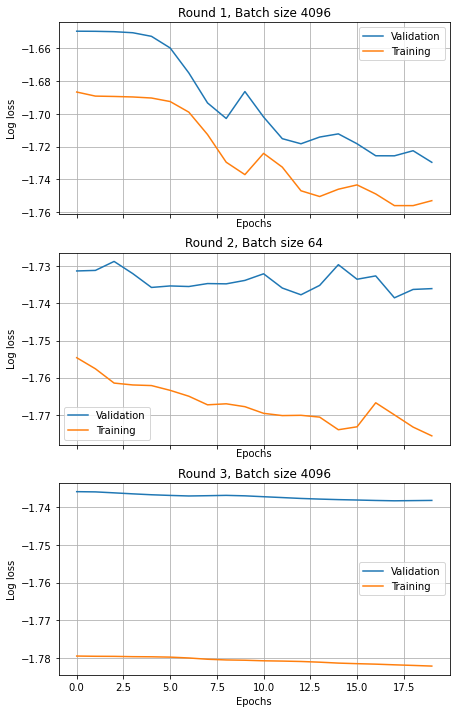

In [22]:
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(len(history), 1, figsize=(7, len(history)*4), sharex=True)

for i in range(len(history)):

  ax[i].set_title(titles[i])
  ax[i].plot(history[i].epoch, np.log(history[i].history['val_loss']), label='Validation')
  ax[i].plot(history[i].epoch, np.log(history[i].history['loss']), label='Training')
  ax[i].set_xlabel('Epochs')
  ax[i].set_ylabel('Log loss')
  ax[i].legend()
  ax[i].grid()

In [25]:
encoded_data=vae.encoder.predict(sd).flatten()
encoded_data.shape

(5000,)

In [26]:
min_x, max_x, grid_n = -2, 2, 401
grid_x = np.linspace(min_x,max_x,grid_n)
decoded=vae.decoder.predict(grid_x)
decoded.shape

(401, 100)

In [0]:
import seaborn as  sns

def feature_cluster(decoded, grid_x, labels, n_grid_lines, figsize=(7,5)):

  clustergrid = sns.clustermap(decoded.T,cmap='viridis', 
                             cbar_kws={'orientation':'horizontal'},
                             figsize = figsize,
                             col_cluster= False, dendrogram_ratio=(0.2,0.0001), 
                             cbar_pos=None, standard_scale=0)

  min_x, max_x, grid_n = grid_x[0], grid_x[-1], len(grid_x)
  grid_lines = np.linspace(min_x,max_x,n_grid_lines)

  ax = clustergrid.ax_heatmap
  feature_order = clustergrid.dendrogram_row.reordered_ind
  ordered_labels = [labels[i] for i in feature_order] 
  ax.set_xticks(np.linspace(1,grid_n,n_grid_lines))
  ax.set_xticklabels(['{:.2}'.format(a) for a in grid_lines ])
  ax.set_yticklabels(ordered_labels)
  ax.tick_params(axis='y',labelright=True, labelleft=False, 
                  left=False, labelrotation=0)
  ax.grid(axis='x')

  return feature_order, ordered_labels

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


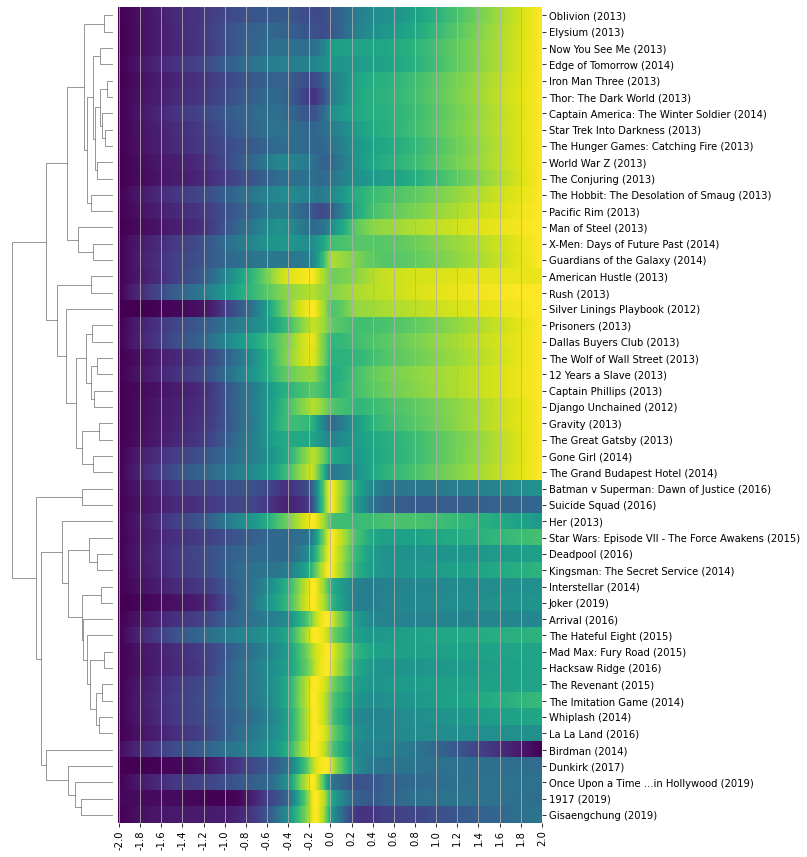

In [28]:
 feature_order, ordered_labels = feature_cluster(decoded[:,:50], grid_x, 
                                                 sd.columns[:50], 
                                                 n_grid_lines=21,
                                                 figsize = (8,12));

In [0]:
def plot_type_dist_list(encoded_data_list, grid_x, decoded, 
                        type_labels, vertical_n, dist_labels):

  fig = plt.figure(figsize=(13,vertical_n*3),constrained_layout=True)
  gs = fig.add_gridspec(vertical_n, 1)
  ax1 = fig.add_subplot(gs[0,:])
  ax2 = fig.add_subplot(gs[1:,:])

  n_grid_lines=21
  min_x, max_x, grid_n = grid_x[0], grid_x[-1], len(grid_x)
  grid_lines = np.linspace(min_x,max_x,n_grid_lines)

  ax1.set_title('Encoded data distribution')
  for i in range(len(encoded_data_list)):
    sns.kdeplot(encoded_data_list[i],bw=0.02, shade = True, 
                ax=ax1, gridsize=2000, label=dist_labels[i])
  ax1.set_xticks( grid_lines )
  ax1.set_xlim(min_x,max_x)
  ax1.grid(axis='x')

  ax2.set_title('VAE types')

  sns.heatmap(decoded.T,cmap='viridis',ax=ax2, cbar_kws={'orientation':'horizontal'})
  ax2.set_xticks(np.linspace(1,grid_n,n_grid_lines))
  ax2.set_xticklabels(['{:.2}'.format(a) for a in grid_lines ])
  ax2.set_yticklabels(type_labels)
  ax2.tick_params(axis='y',labelright=True, labelleft=False, 
                  left=False, labelrotation=0)
  ax2.grid(axis='x')

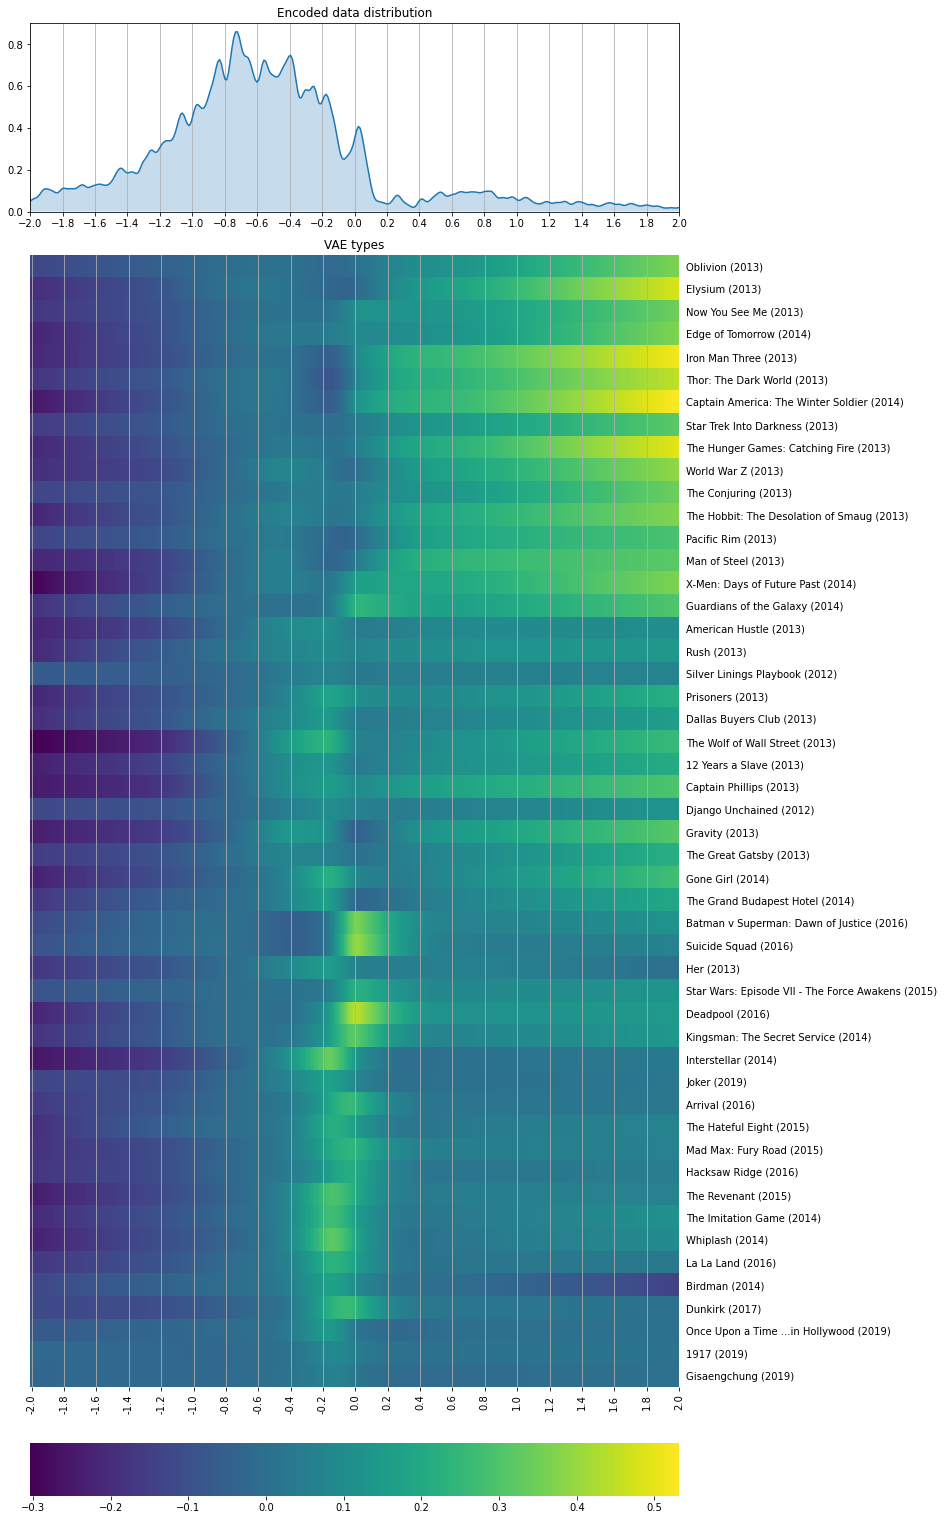

In [30]:
plot_type_dist_list([encoded_data], 
                    grid_x, decoded[:,feature_order], 
                    type_labels=ordered_labels, vertical_n=7,
                    dist_labels = [''])